In [1]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model input (28x28x1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [12]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y_test)
print(f"Model Accuracy on MNIST Test Dataset: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Model Accuracy on MNIST Test Dataset: 99.59%


## Test with written numbers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


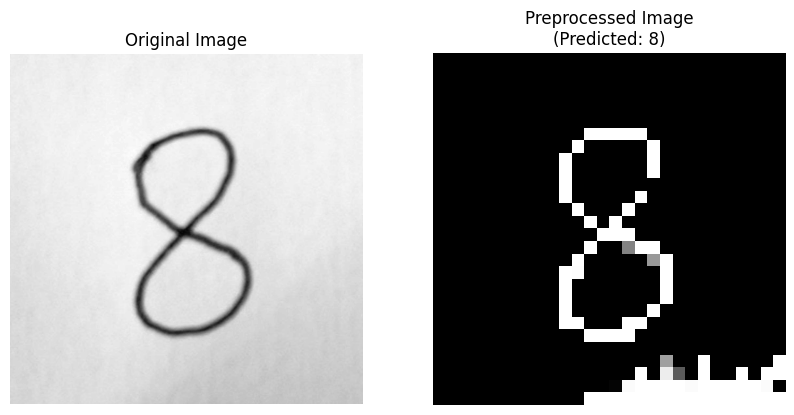

Image: eight.jpg, Predicted Digit: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


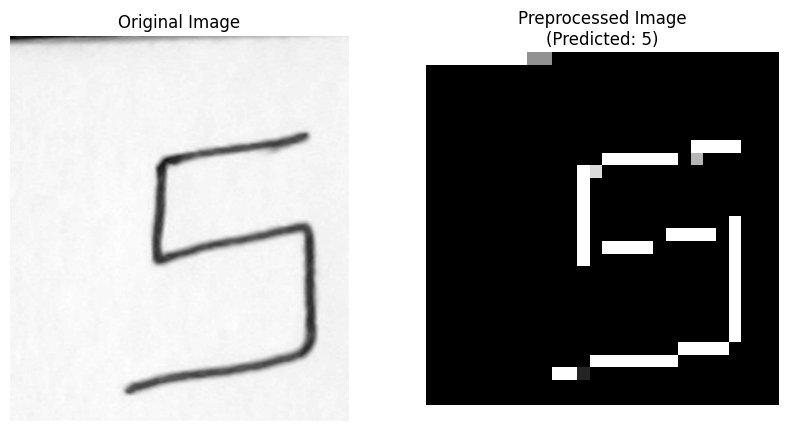

Image: five.jpg, Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


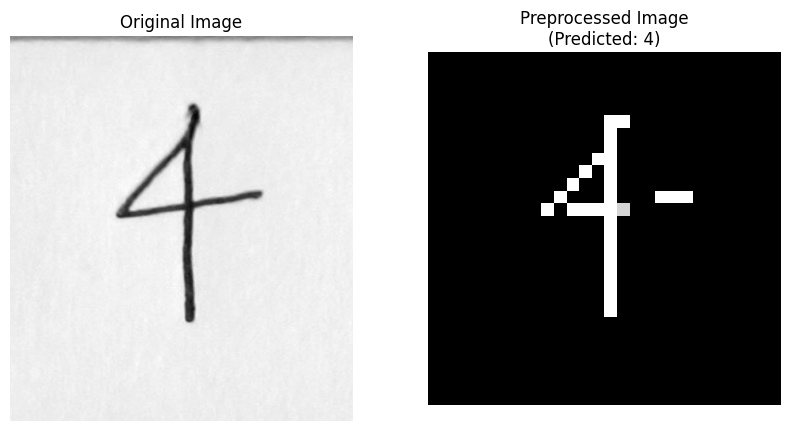

Image: four.jpg, Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


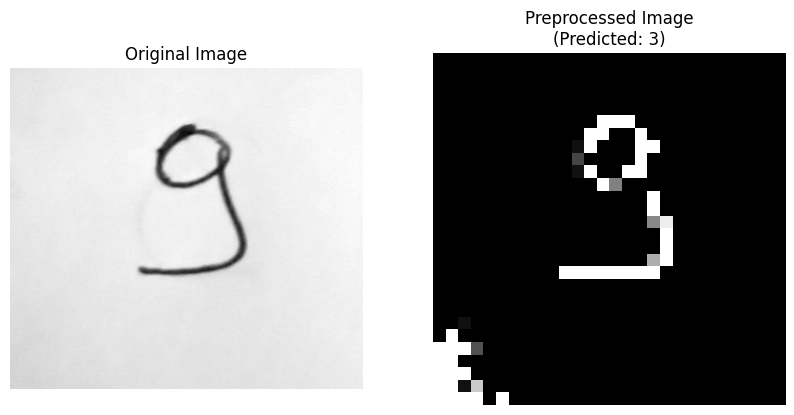

Image: nine.jpg, Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


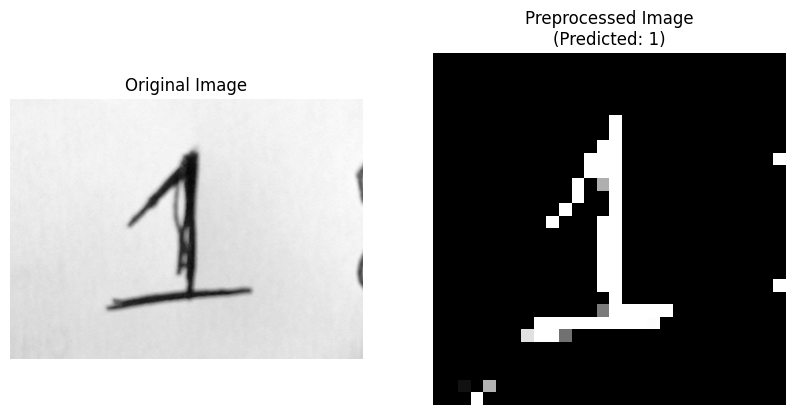

Image: one.jpg, Predicted Digit: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


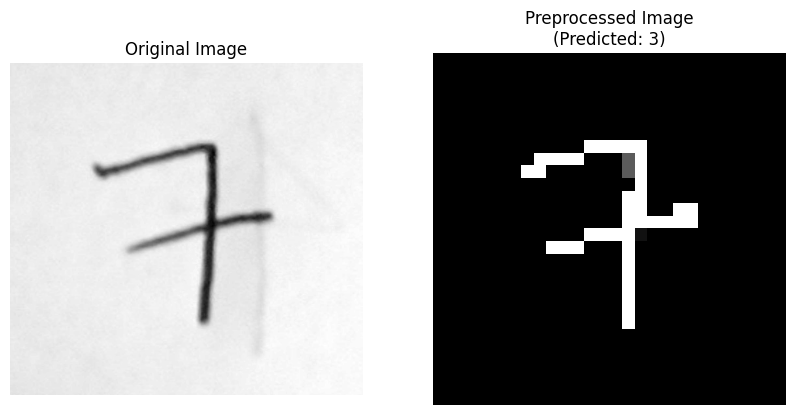

Image: seven.jpg, Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


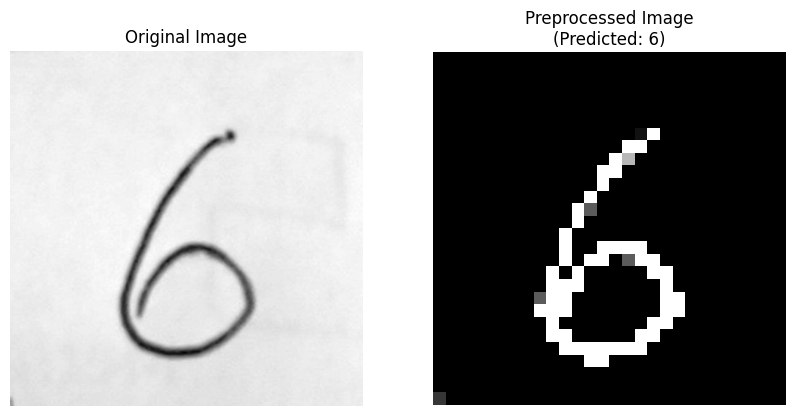

Image: six.jpg, Predicted Digit: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


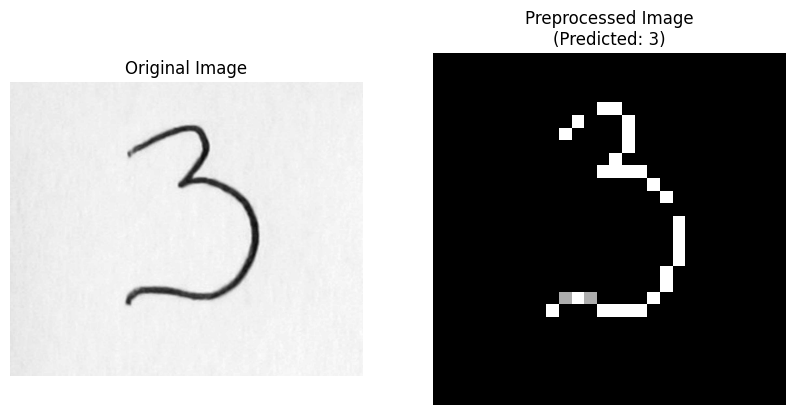

Image: three.jpg, Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


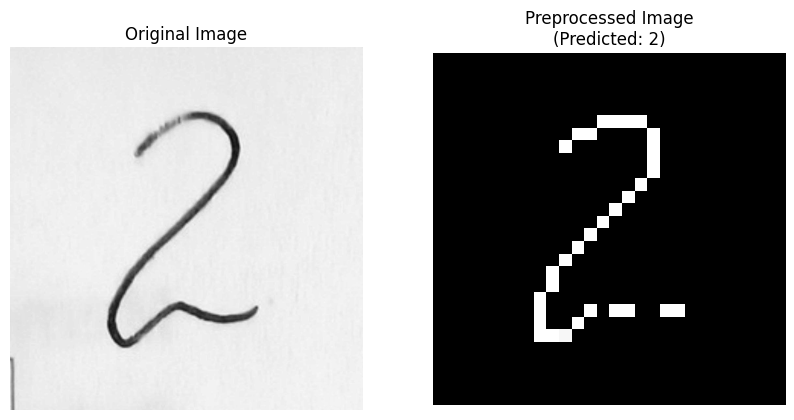

Image: two.jpg, Predicted Digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


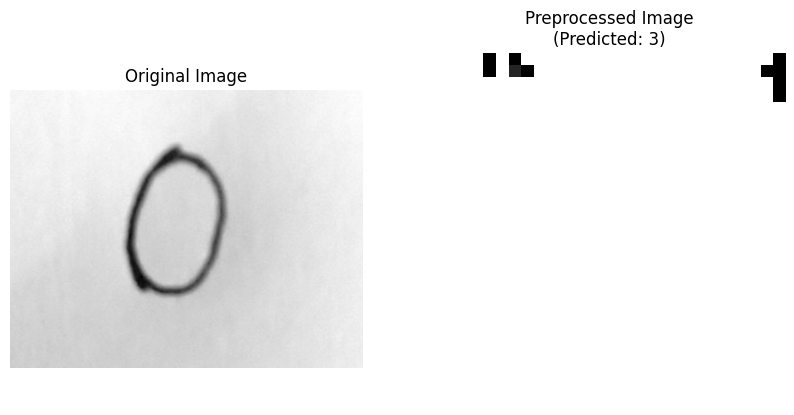

Image: zero.jpg, Predicted Digit: 3


In [46]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, img_bin = cv2.threshold(img, 180, 230, cv2.THRESH_BINARY_INV)
    
    # Resize the image to 28x28
    img_resized = cv2.resize(img_bin, (28, 28))
    
    # Normalize pixel values to [0, 1]
    img_normalized = img_resized.astype('float32') / 255.0
    
    # Reshape to match the model's expected input (1, 28, 28, 1)
    img_normalized = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension
    img_normalized = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    
    return img, img_resized, img_normalized

image_folder = 'digits'

for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    # Preprocess and get both original and resized images
    original, resized, preprocessed = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(preprocessed)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the images side by side
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(resized, cmap='gray')
    plt.title(f"Preprocessed Image\n(Predicted: {predicted_class})")
    plt.axis('off')

    plt.show()

    print(f"Image: {image_name}, Predicted Digit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


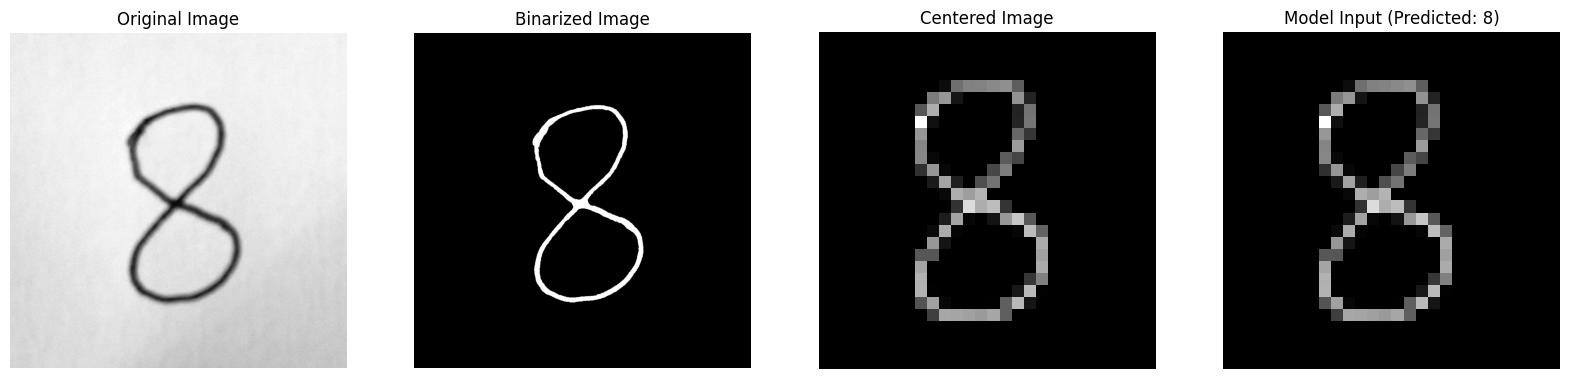

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


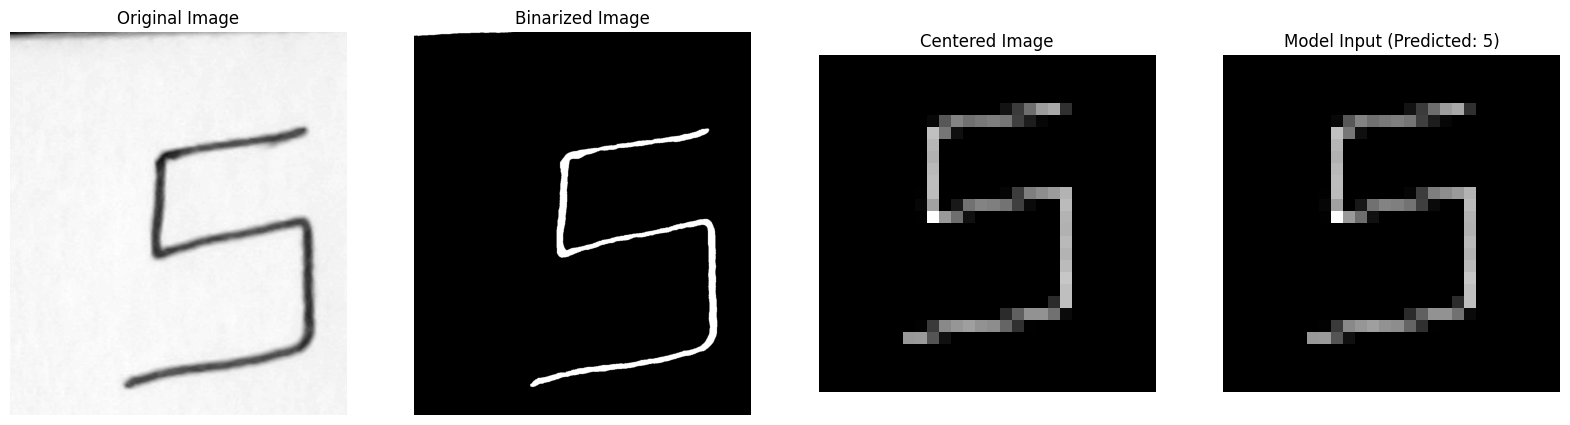

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


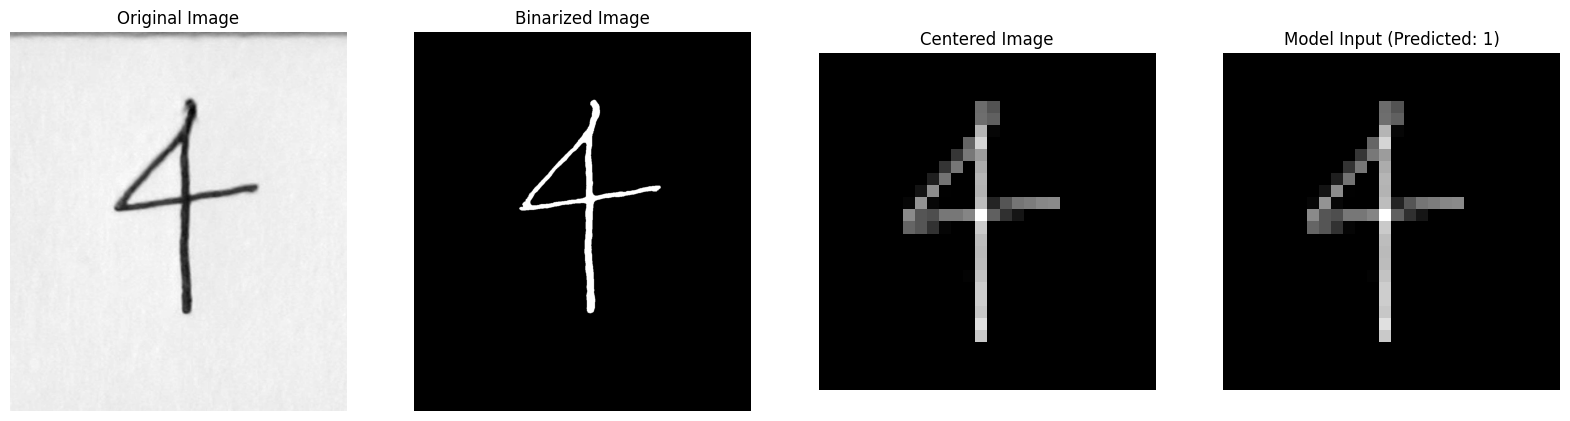

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


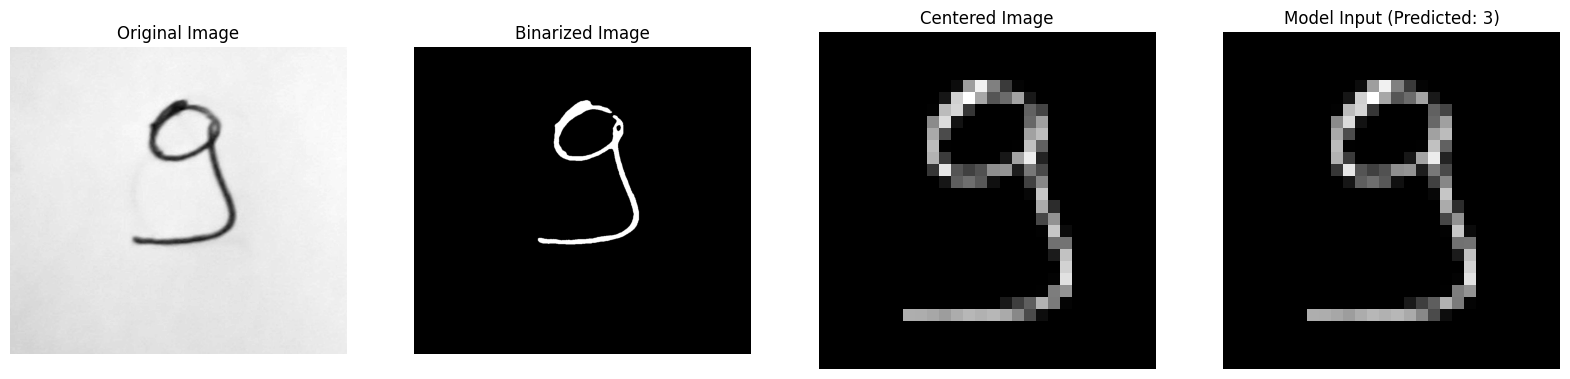

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


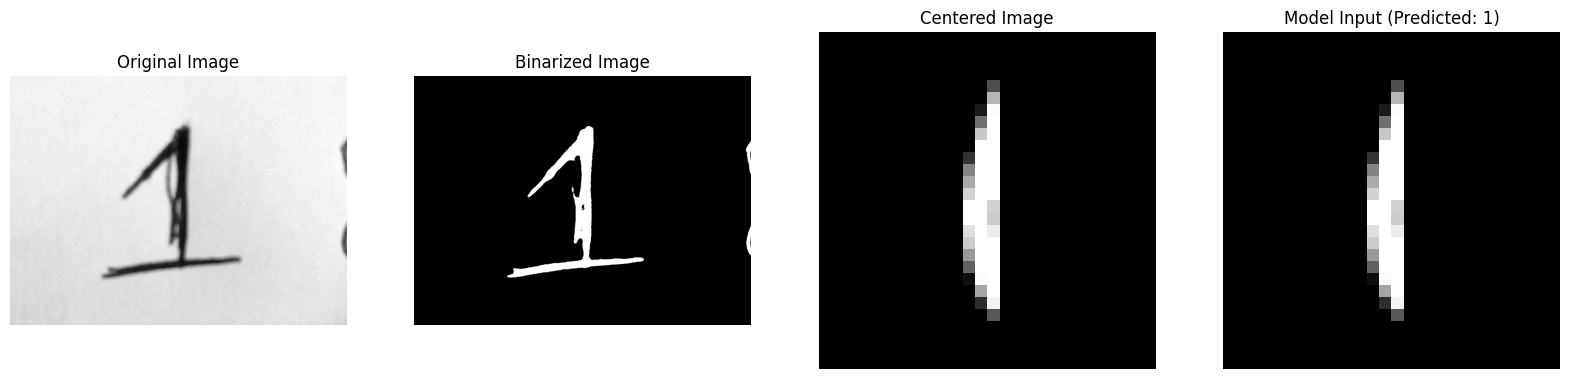

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


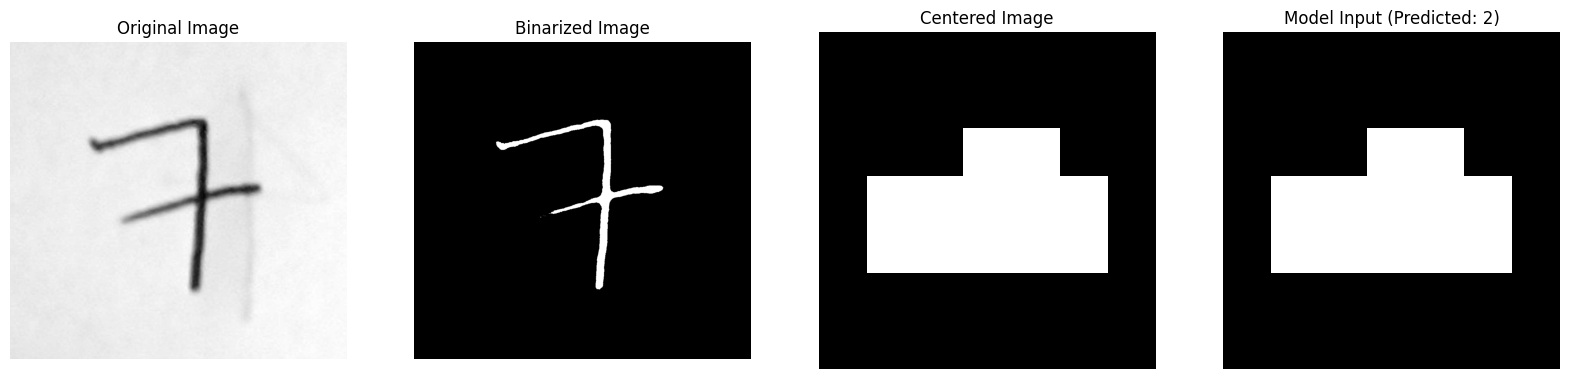

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


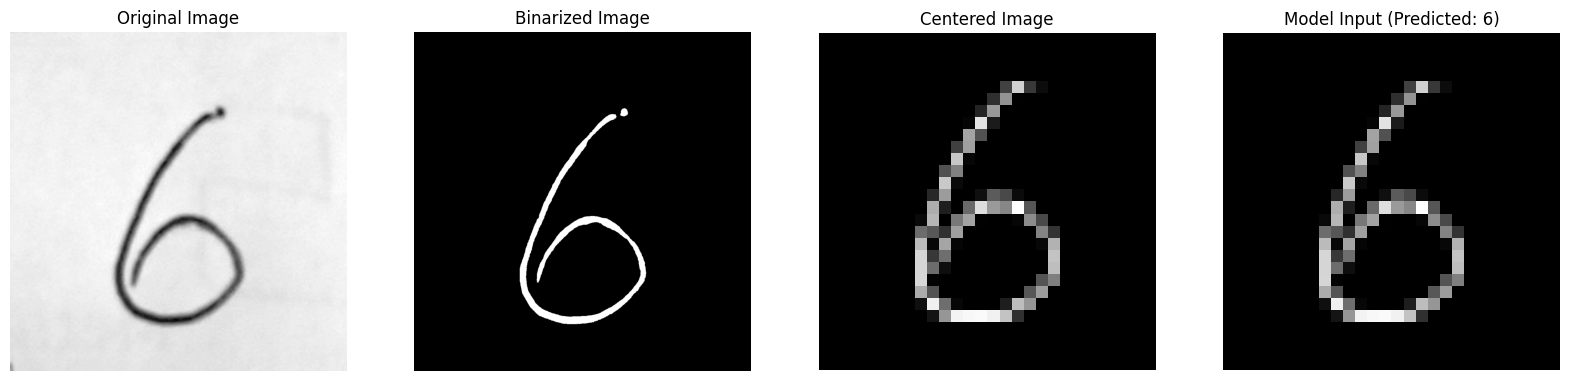

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


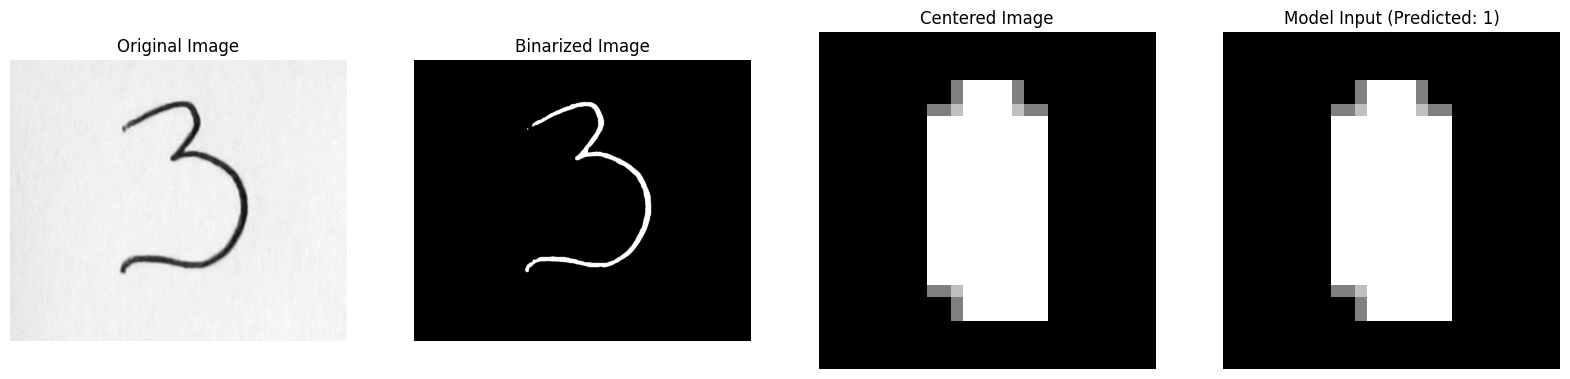

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


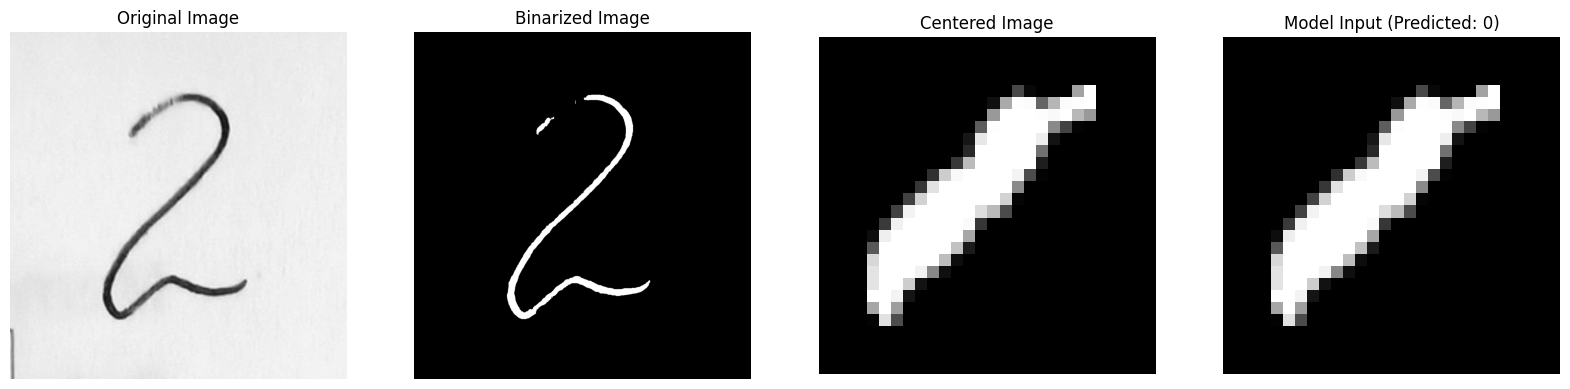

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


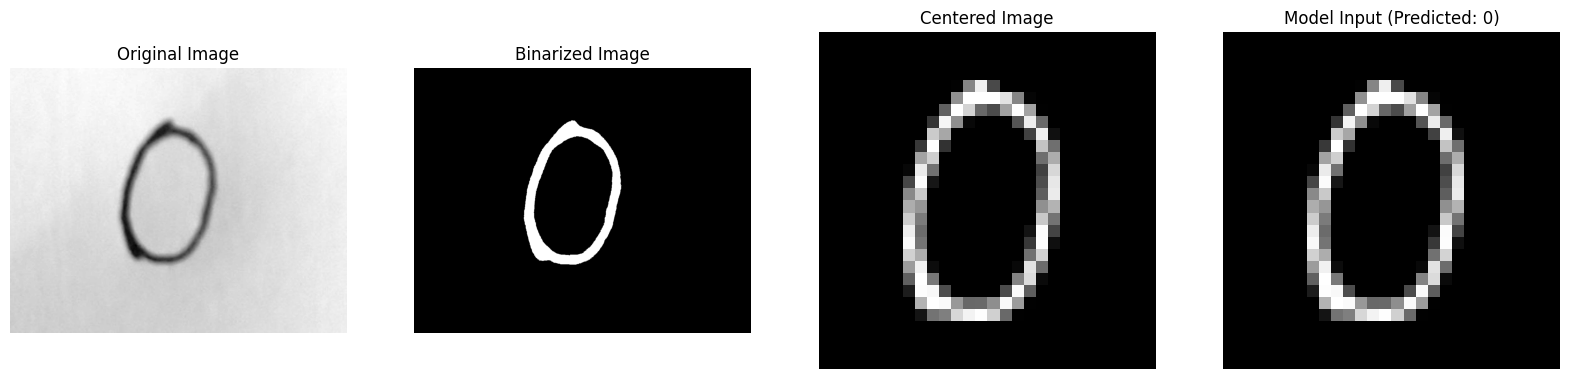

In [35]:
def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply thresholding to binarize the image
    _, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Apply dilation to thicken the digit
    kernel = np.ones((2, 2), np.uint8)
    img_dilated = cv2.dilate(img_bin, kernel, iterations=1)
    
    # Find bounding box of the digit
    contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        img_cropped = img_dilated[y:y+h, x:x+w]
    else:
        img_cropped = img_dilated  # Fallback if no contour is found
    
    # Resize the cropped image to maintain aspect ratio
    h, w = img_cropped.shape
    scale = 20 / max(h, w)  # Target size within a 28x28 canvas
    new_h, new_w = int(h * scale), int(w * scale)
    img_resized = cv2.resize(img_cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)
    
    # Create a blank canvas and center the resized digit
    canvas = np.zeros((28, 28), dtype='uint8')
    top = (28 - new_h) // 2
    left = (28 - new_w) // 2
    canvas[top:top + new_h, left:left + new_w] = img_resized
    
    # Normalize pixel values to [0, 1]
    img_normalized = canvas.astype('float32') / 255.0
    
    # Reshape to match the model's expected input (1, 28, 28, 1)
    img_normalized = np.expand_dims(img_normalized, axis=-1)  # Add channel dimension
    img_normalized = np.expand_dims(img_normalized, axis=0)  # Add batch dimension
    
    return img, img_bin, canvas, img_normalized


for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    
    # Preprocess and get original, binarized, centered, and normalized images
    original, binarized, centered, input_tensor = preprocess_image(image_path)
    
    # Make predictions
    prediction = model.predict(input_tensor)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Display the images
    plt.figure(figsize=(20, 5))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Binarized image
    plt.subplot(1, 4, 2)
    plt.imshow(binarized, cmap='gray')
    plt.title("Binarized Image")
    plt.axis('off')

    # Centered image
    plt.subplot(1, 4, 3)
    plt.imshow(centered, cmap='gray')
    plt.title("Centered Image")
    plt.axis('off')

    # Normalized input to the model
    plt.subplot(1, 4, 4)
    plt.imshow(input_tensor.squeeze(), cmap='gray')
    plt.title(f"Model Input (Predicted: {predicted_class})")
    plt.axis('off')

    plt.show()
